# Image Pre-Processing (Test)

#### Abstract
The images downladed from SSENSE website, are in various sizes, and they are not suitable for training purposes.
Therefore, we have to make sure that 1) they are all in a same size; 2) they have the original size ratio; 3) preferably turn them into gray scale to reduce the dimensionality of the images, which can lead to reduction of training computation.

#### Note
This notebook is practicing the pre-processing steps on only one image to make sure that the algorithms are working correctly.
Later this notebook should be extended to convert all images and generate the dataset.

In [2]:
import os, sys
from PIL import Image
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [19]:
# Setting a working directory (path)
root_working_path = "C:\\Users\\kaveh.bakhtiyari\\JupyterProjects\\ImageSearch-ACE"

#### Resizing | Black & White

Images should be resized into a square image but keeping the original ratio.
To do this, we have to create a blank image space in our desired size (*desired_size x desired_size*).
Resizing the original image with the original ratio respecting the max width or height to match *desired_size*.
Pasting the resized image onto the center of the blank image area and leaving the other areas "*White*".

#### Note:
Images are resized into 224x224 pixels in order to keep them suitable for VGG model if we intend to use this model later.

In [29]:
# resizing and turing into Black & White

# a square image (desired_size x desired_size)
desired_size = 224

infile = root_working_path + "\\images\\0.jpg"
outfile = os.path.splitext(infile)[0] + "-bw-res.jpg"
if infile != outfile:
    try:
        im = Image.open(infile)
        
        # converting into black & white (L)
        im = im.convert('L')
      
        # calculating the original ratio
        #im.thumbnail(desired_size, Image.ANTIALIAS)
        old_size = im.size
        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        
        # resizing the image
        im = im.resize(new_size, Image.ANTIALIAS)
        new_im = Image.new("RGB", (desired_size,desired_size), (255,255,255)) # White background space
        
        # pasting the resized image onto the image space
        new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
        
        # saving the final image
        new_im.save(outfile, "JPEG")
        print("Image saved successfully: '%s'" % outfile)
    except IOError:
        print("Cannot create B&W for '%s'" % infile)

Image saved successfully: 'C:\Users\kaveh.bakhtiyari\JupyterProjects\ImageSearch-ACE\images\0-bw-res.jpg'


#### Plotting Images

After converting the image, we would like to plot them to make sure that the final output comply with our expectation.

[array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255]])]


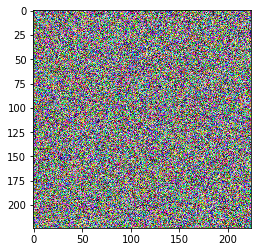

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(200, 200, 3)


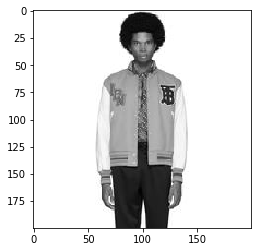

<class 'numpy.ndarray'>
(200, 200, 1)


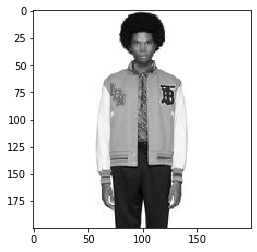

In [24]:
# opening image
infile = root_working_path + "\\images\\0-bw-res.jpg"
im = Image.open(infile)

# spliting the image channels
source = im.split()
R, G, B = 0, 1, 2
#im = Image.merge(im.mode, source)
np_raw = (np.array(im.getdata())[20:30,0:1].reshape(1,1,10))
print(list(np_raw))
#print (list(im.getdata())[1:10])


img = np.random.rand(224,224,3)
plt.imshow(img)
plt.show()

#load image into Keras
img = image.load_img(infile, target_size=(200, 200))
print(type(img))

#3-Channels
x = image.img_to_array(img)
print(type(x))
print(x.shape)

plt.imshow(x/255.)
plt.show()

#1-Channel (Black-&-White / Monochrome)
y = x[:,:,0]
y = y.reshape(y.shape[0],y.shape[1],1)
print(type(y))
print(y.shape)

plt.imshow(y.reshape(200, 200))
plt.gray()
plt.show()

#### Reshaping

Reshaping a frame to store the images properly for NN model.

In [25]:
frames = np.empty((2, 200, 200, 1))
print(frames.shape)
frames[0,:,:,:] = y
frames[1,:,:,:] = y

print(frames[0][0].shape)

(2, 200, 200, 1)
(200, 1)


#### Retrieving files

A sample code to retieve a list of files from a folder.<br>
In our case, we would like to use this to retrieve images and convert them in batch.

In [26]:
from os import walk
mypath = "\\"
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
    
# all retrieved files are stored in "f" array.
print(f)

['bootTel.dat', 'hiberfil.sys', 'pagefile.sys', 'SSENSE_WIN10_COMPLETE.swm', 'swapfile.sys']


#### Structure Checking

Checking the structure of a sample data from MNIST dataset.

In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

print(x_test.shape)
print(x_test[0])

Using TensorFlow backend.


(10000, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  